In [8]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
log_directory = Path("/Users/andreas/desktop/exp-backup/privacy")
result_files = [path for path in log_directory.iterdir() if path.suffix == ".csv" and "results_" in path.name]

dfs = []
hyperparams = []

for f in result_files:
    print(f"Loading results file \"{f.name}\"")
    dfs.append(pd.read_csv(f))

    parameters = ["devices", "epochs", "local_epochs", "local_batch_size", "clients_per_round",
                  "l2_norm_clip", "noise_multiplier", "local_dp", "start_time"]
    parameter_values = f.stem.lstrip("results_").split("_")
    assert len(parameter_values) == len(parameters)
    hyperparams.append(
        {key: value for (key, value) in zip(parameters, parameter_values)}
    )
experiments = list(zip(hyperparams, dfs))

Loading results file "results_100_200_10_10_25_0.5_1.0_True_1620185721.4880195.csv"
Loading results file "results_100_200_10_10_25_1.0_1.0_True_1620142591.121372.csv"
Loading results file "results_100_100_10_10_25_1.0_1.0_True_1620069484.2339427.csv"
Loading results file "results_100_100_10_10_25_2.0_2.0_True_1620103258.759496.csv"
Loading results file "results_100_100_10_10_25_2.0_1.0_True_1620092409.3110318.csv"
Loading results file "results_100_100_10_10_25_4.0_1.0_False_1620091111.6989982.csv"
Loading results file "results_100_200_10_10_25_2.0_1.0_True_1620207434.981191.csv"
Loading results file "results_100_100_10_10_25_2.0_1.0_True_1620080273.6212692.csv"
Loading results file "results_100_100_10_10_25_1.0_1.0_True_1620132807.217482.csv"
Loading results file "results_100_200_10_10_25_10.0_1.0_True_1620164189.1249459.csv"


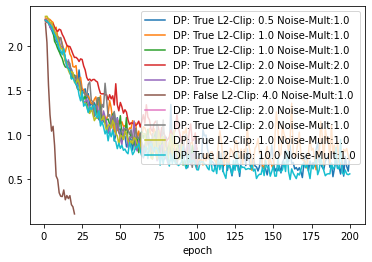

In [10]:
# Test Loss Plot
fig, ax = plt.subplots()
for params, df in experiments:
    df.plot(x="epoch", y="test_loss", ax=ax, label=f'DP: {params["local_dp"]} L2-Clip: {params["l2_norm_clip"]} Noise-Mult:{params["noise_multiplier"]}')
fig.savefig(log_directory / "test_loss.pdf")

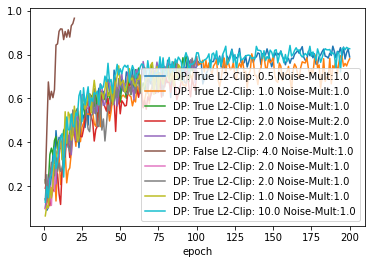

In [11]:
# Test Accuracy Plot
fig, ax = plt.subplots()
for params, df in experiments:
    df.plot(x="epoch", y="test_accuracy", ax=ax, label=f'DP: {params["local_dp"]} L2-Clip: {params["l2_norm_clip"]} Noise-Mult:{params["noise_multiplier"]}')
fig.savefig(log_directory / "test_accuracy.pdf")

In [5]:
dfs[0]

,Unnamed: 0,test_loss,test_accuracy,epoch,devices,epochs,local_epochs,clients_call_duration,clients_per_round,client_histories,privacy_params,privacy_guarantees
0,0,2.294794,0.1428,1,100,200,10,104.658110,25,"[{'loss': [2.261688709259033, 2.17026400566101...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."
1,1,2.283025,0.0900,2,100,200,10,103.064384,25,"[{'loss': [2.322435140609741, 2.17382431030273...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."
2,2,2.268239,0.1036,3,100,200,10,107.189184,25,"[{'loss': [2.3513386249542236, 2.1287572383880...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."
3,3,2.214347,0.1782,4,100,200,10,102.717068,25,"[{'loss': [2.0153748989105225, 1.7250136137008...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."
4,4,2.179952,0.2502,5,100,200,10,104.779623,25,"[{'loss': [1.8382097482681274, 1.5813357830047...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."
...,...,...,...,...,...,...,...,...,...,...,...,...
164,164,0.633508,0.8092,165,100,200,10,97.402800,25,"[{'loss': [0.2582419514656067, 0.0514330528676...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."
165,165,0.602098,0.8194,166,100,200,10,104.937422,25,"[{'loss': [0.8362752199172974, 0.2513943314552...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."
166,166,0.631273,0.8056,167,100,200,10,109.269114,25,"[{'loss': [1.0455561876296997, 0.5873364806175...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."
167,167,0.588946,0.8223,168,100,200,10,105.042847,25,"[{'loss': [0.48341789841651917, 0.078661531209...","{""l2_norm_clip"": 0.5, ""noise_multiplier"": 1.0,...","['{""eps"": 1.9491760312874982, ""delta"": 0.00087..."


<AxesSubplot:xlabel='privacy_params', ylabel='eps_per_round_and_client'>

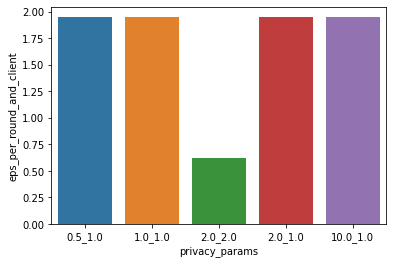

In [6]:
# Eps Guarantees
privacy_dfs = []
for params, df in [exp for exp in experiments if exp[0]["local_dp"] == "True"]:
    df = df.copy()
    df["privacy_params"] =  f'{params["l2_norm_clip"]}_{params["noise_multiplier"]}'
    df["privacy_guarantees"] = df.privacy_guarantees.map(lambda x: x.replace("'", "")).map(json.loads)
    eps_per_round_and_client = df["privacy_guarantees"][0][0]['eps']
    delta_per_round_and_client = df["privacy_guarantees"][0][0]['delta']
    df["eps_per_round_and_client"] = eps_per_round_and_client
    df["delta_per_round_and_client"] = delta_per_round_and_client
    df["eps_delta_per_round_and_client"] = f"({eps_per_round_and_client}, {delta_per_round_and_client})"
    privacy_dfs.append(df)

combined_df = pd.concat(privacy_dfs)
fig, ax = plt.subplots()
sns.barplot(x="privacy_params", y="eps_per_round_and_client", data=combined_df, ax=ax)
    #df.plot(x="epoch", y="test_accuracy", ax=ax, label=f'Clip: {params["l2_norm_clip"]} Noise:{params["noise_multiplier"]}')
#fig.savefig(log_directory / "test_accuracy.pdf")

In [7]:
eps_per_round_and_client, delta_per_round_and_client

(1.9491760312874982, 0.0008790905764232305)